In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
## these should be able to take care of the EDA 


In [2]:
#lets load both our train and test datasets .
# additionally , lets also load our variable definition file

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
vardef = pd.read_csv('VariableDefinitions.csv')

# lets create a copy for both the train and test dataset 
trainCopy = train.copy()
testCopy = test.copy()


# lets have a look at our variable definition 
vardef

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [3]:
# lets have a look at the shape for train
train.shape

(23524, 13)

In [4]:
train.ndim

2

In [5]:
#let us view the first ten rows of our dataset 
train.head(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [7]:
train.describe(include='object').T

,count,unique,top,freq
country,23524,4,Rwanda,8735
uniqueid,23524,8735,uniqueid_1691,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


###  1. Country 

In [8]:
# Exploratory Data Analysis 
# Country 
# Which country has the large number of participants?
train.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

<AxesSubplot:>

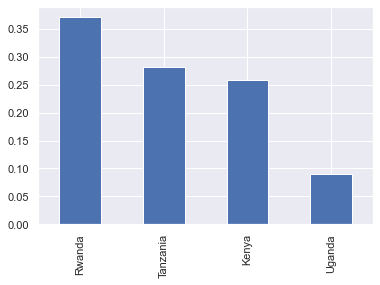

In [9]:
# visualizing it 
train.country.value_counts(normalize=True).plot.bar()

- Rwanda has a large number of participants 
- The second is  Tanzania 
- The third one is Kenya 
-  Fourth is Uganda . 
- Uganda has the  lowest number of participants 


In [10]:
# which country has individuals  with a large number of approved banks accounts?
bc = pd.crosstab(train.country,train.bank_account)
bc

bank_account,No,Yes
country,,
Kenya,4547,1521
Rwanda,7732,1003
Tanzania,6013,607
Uganda,1920,181


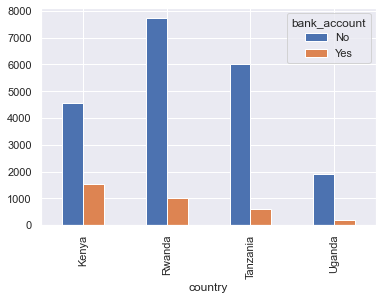

In [11]:
#plotting grouped bar chart 
bc.plot.bar()
plt.legend(title='bank_account')

plt.show()

##### from this we can see that :
- Kenya has the largest approved number of bank accounts 
- Rwanda has the second largest approval 
-Tanzania has the third while Uganda has the least number of approved bank accounts
-Most of the individuals who participated were not approved for bank account 

In [12]:
# What is the percentage  of rural /urban  in each country ?
lc=pd.crosstab(train.country,train.location_type)
lc

location_type,Rural,Urban
country,,
Kenya,3543,2525
Rwanda,7483,1252
Tanzania,1809,4811
Uganda,1508,593


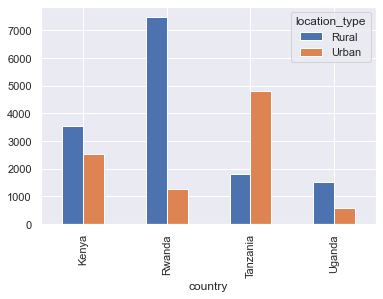

In [13]:
#plotting grouped bar chart
sns.color_palette("muted")
lc.plot.bar()
plt.legend(title='location_type')

plt.show()

#### From this we can see that :
-  Rwanda has the largest number of participants from Rural areas
- Tanzania has a large number of participants from Urban areas 

In [14]:
# which country has a large number of cellphone access?
cc = pd.crosstab(train.country,train.cellphone_access).sort_values('Yes',ascending=False)
cc

cellphone_access,No,Yes
country,,
Rwanda,1486,7249
Kenya,1283,4785
Tanzania,2664,3956
Uganda,637,1464


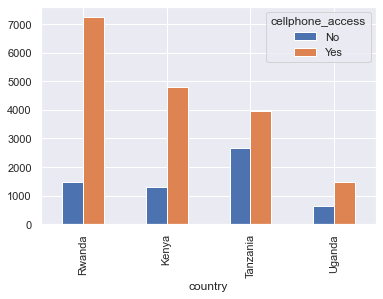

In [15]:
cc.plot.bar()
plt.legend(title='cellphone_access')

plt.show()

#### We can conclude that:
-  Rwanda has the largest number of cellphone access
- Kenya is the second while Tanzania is the third 
- Uganda has the least number of  individuals with cellphone access

In [16]:
#What is the average household size for each country 
pd.crosstab(train.country,train.household_size)

household_size,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
country,,,,,,,,,,,,,,,,,,,,
Kenya,1003,852,944,979,813,612,397,227,129,57,24,14,8,2,4,2,0,0,0,1
Rwanda,475,895,1592,1690,1544,1146,777,371,152,63,19,8,3,0,0,0,0,0,0,0
Tanzania,1405,3230,1050,520,232,107,38,19,7,5,4,2,0,1,0,0,0,0,0,0
Uganda,174,252,334,285,264,231,188,134,75,65,22,44,14,7,7,2,1,1,1,0


- We can see that , large numbers of family household individuals  range from 1-13
- Rwanda has a high number of household_size from 2-7
- Tanzania has a high number of household_size from 1-4
- Kenya on the other hand has a high number of household_size ranging from 1-6

In [17]:
train['fam_bin']= pd.qcut(train.household_size,3,labels=['Small','Medium','Large'])

test['fam_bin']= pd.qcut(test.household_size,3,labels=['Small','Medium','Large'])

In [18]:
cf = pd.crosstab(train.country,train.fam_bin)
cf

fam_bin,Small,Medium,Large
country,,,
Kenya,1855,2736,1477
Rwanda,1370,4826,2539
Tanzania,4635,1802,183
Uganda,426,883,792


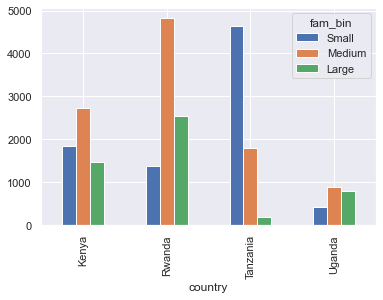

In [19]:
cf.plot.bar()
plt.legend(title='fam_bin')

plt.show()

####  from binning the household size we can observe the following :
- Kenya  ,Rwanda and Uganda have a huge number of individuals coming from medium sized households. 
- Tanzania however , seems to have a large number of participants coming from a small size households.

In [20]:
# What is the average age of respondents  for each country 
pd.crosstab(train.country,train.age_of_respondent)

age_of_respondent,16,17,18,19,20,21,22,23,24,25,...,91,92,93,94,95,96,97,98,99,100
country,,,,,,,,,,,,,,,,,,,,,
Kenya,127,150,156,95,152,114,149,141,136,192,...,1,4,4,2,10,0,0,0,0,0
Rwanda,178,169,205,177,191,161,147,186,178,263,...,2,2,0,1,5,2,1,1,1,0
Tanzania,114,126,150,128,191,130,210,183,174,238,...,2,1,0,2,3,1,0,3,1,5
Uganda,43,32,74,70,92,66,62,78,74,99,...,0,0,0,0,1,0,0,2,0,0


In [21]:
# let us try binning the age of respondent to find out the distribution for each country 
train['age_bins'] =pd.qcut(train.age_of_respondent, 4, labels=['Young','Youth','Adult','Old-ish'])


test['age_bins'] =pd.qcut(test.age_of_respondent, 4, labels=['Young','Youth','Adult','Old-ish'])

In [22]:
ca=pd.crosstab(train.country,train.age_bins)
ca

age_bins,Young,Youth,Adult,Old-ish
country,,,,
Kenya,1608,1437,1390,1633
Rwanda,2045,2343,2171,2176
Tanzania,1815,1654,1614,1537
Uganda,748,524,432,397


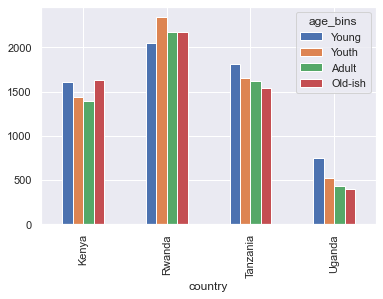

In [23]:
ca.plot.bar()
plt.legend(title='age_bins')

plt.show()

#### from the figure above we can conclude the following :
-Kenya has a leading number of participants who are young and old-ish
- Rwanda has a leading number of participants who are youth 
-Tanzania has a leading number of participants who are young 
-Uganda also young people leading 


In [24]:
# for each respondent , what is the majority  relationship with head ?
cr= pd.crosstab(train.country,train.relationship_with_head)
cr

relationship_with_head,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse
country,,,,,,
Kenya,775,3535,37,250,28,1443
Rwanda,1214,4575,86,88,231,2541
Tanzania,199,3697,47,237,636,1804
Uganda,41,1024,20,93,191,732


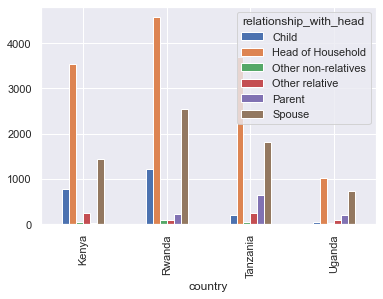

In [25]:
cr.plot.bar()
plt.legend(title='relationship_with_head')

plt.show()

#### from this we can observe that :
 - For each country that participated in the survey the highest number of relationship with head is head of the household followed by spouse

In [26]:
## let us have a look at the marital status for each country 
cm= pd.crosstab(train.country,train.marital_status)
cm

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed
country,,,,,
Kenya,354,8,3523,1508,675
Rwanda,474,0,5196,1867,1198
Tanzania,1081,0,667,4229,643
Uganda,167,0,1363,379,192


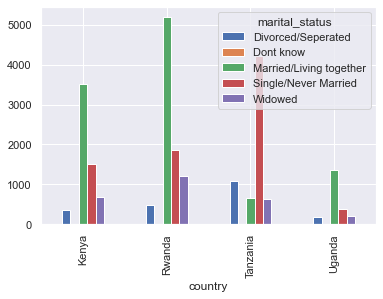

In [27]:
cm.plot.bar()
plt.legend(title='marital_status')

plt.show()

#### from this we can see that:
-  Kenya high number of participants are married , followed by single individuals 
- Rwanda also has a high number of married and single individuals 
- Tanzania participants are mostly single and divorced individuals
- Uganda has a high number of individuals who are married 

###### we will remove the dont know variable as it does not have any value

In [28]:
# What is the highest level of education of participants from each country 
ce =pd.crosstab(train.country,train.education_level)
ce

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
country,,,,,,
Kenya,941,8,2600,1785,292,442
Rwanda,2122,18,4836,1491,177,91
Tanzania,1133,3,4224,433,656,171
Uganda,319,6,1131,514,32,99


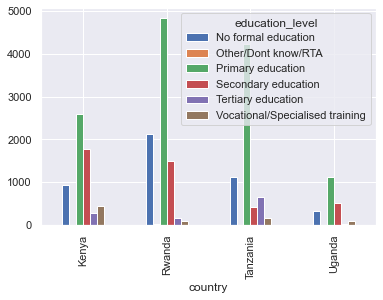

In [29]:
ce.plot.bar()
plt.legend(title='education_level')

plt.show()

- We can see that the highest level of education for most countries  is primary education
- We can also get rid of the other/dontknow/rta variable as  other variables seem to have high numbers 

In [30]:
# Lets have a look at the job type distribution for each individual in each respective country
cj= pd.crosstab(train.country,train.job_type)
cj

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
country,,,,,,,,,,
Kenya,3,1609,260,416,65,1419,0,154,1188,954
Rwanda,56,3832,127,161,91,2878,0,323,662,605
Tanzania,0,0,0,370,84,1300,380,35,677,3774
Uganda,67,0,0,108,7,0,247,568,0,1104


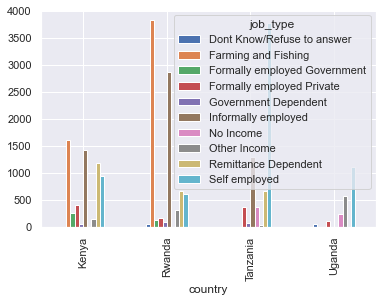

In [31]:
cj.plot.bar()
plt.legend(title='job_type')

plt.show()

####  We can see that :
- Kenya and Rwanda has a large number of individuals who practice farming and fishing followed by informally employed job_type.
- Tanzania and Uganda has a  large number of individuals who are self_employed.

### 2.Year

In [32]:
#  let us have a look at the distribution of participants in each country over the years 
cy= pd.crosstab(train.country,train.year)
cy

year,2016,2017,2018
country,,,
Kenya,0,0,6068
Rwanda,8735,0,0
Tanzania,0,6620,0
Uganda,0,0,2101


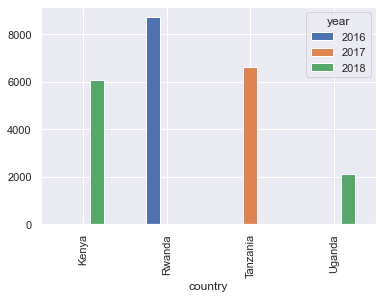

In [33]:
cy.plot.bar()
plt.legend(title='year')

plt.show()

#### We can see that  each year was  conducted differently :
- Kenya was conducted in 2018
- Rwanda was conducted in 2016
- Tanzania was conducted in 2017
-Uganda was conducted in 2018

In [34]:
#which year had the highest access to cellphone ?
yc=pd.crosstab(train.year,train.cellphone_access)
yc

cellphone_access,No,Yes
year,,
2016,1486,7249
2017,2664,3956
2018,1920,6249


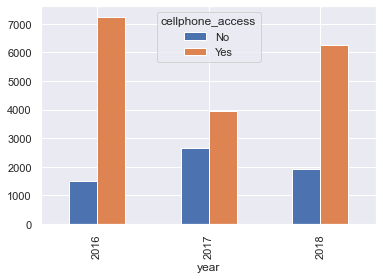

In [35]:
yc.plot.bar()
plt.legend(title='cellphone_access')

plt.show()

- we can see that 2016 had the highest access to cellphone 

In [36]:
#Does household size increase /decrease over the years?
ya= pd.crosstab(train.year,train.age_bins)
ya

age_bins,Young,Youth,Adult,Old-ish
year,,,,
2016,2045,2343,2171,2176
2017,1815,1654,1614,1537
2018,2356,1961,1822,2030


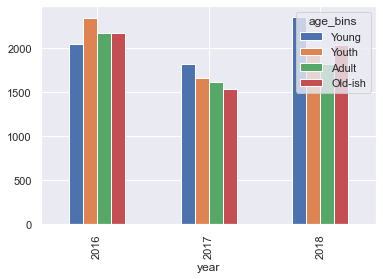

In [37]:
ya.plot.bar()
plt.legend(title='age_bins')

plt.show()

#### from the diagram above , we can see that :
- In 2016, a large number of the participants were youth 
- In 2017 , a large number of participants were young people 
-In 2018 , a large number of participants were also young people

In [38]:
# What is the level of marital status over the years?
ym = pd.crosstab(train.year,train.marital_status)
ym

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed
year,,,,,
2016,474,0,5196,1867,1198
2017,1081,0,667,4229,643
2018,521,8,4886,1887,867


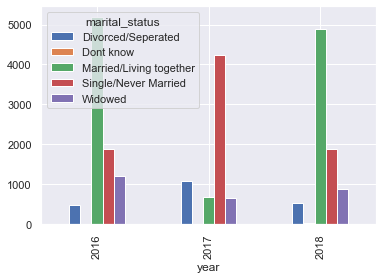

In [39]:
ym.plot.bar()
plt.legend(title='marital_status')

plt.show()

#### From the diagram above we can see that :
- in 2016 and 2018 , the highest number of participants were married 
-in 2017 , the highest number of participants were single 

In [40]:
# Does access to bank account increase or decrease over the years ?
yb= pd.crosstab(train.year,train.bank_account)
yb

bank_account,No,Yes
year,,
2016,7732,1003
2017,6013,607
2018,6467,1702


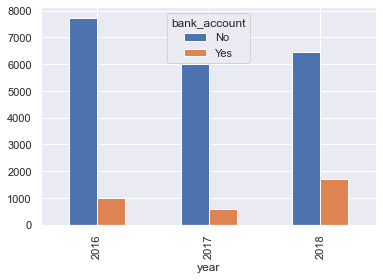

In [41]:
yb.plot.bar()
plt.legend(title='bank_account')

plt.show()

#### From the diagram above we can see that :
- 2018 had the largest number of approved bank accounts as compared to the rest 

In [42]:
#what is highest relationship with head over the years?
yr =pd.crosstab(train.year,train.relationship_with_head)
yr

relationship_with_head,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse
year,,,,,,
2016,1214,4575,86,88,231,2541
2017,199,3697,47,237,636,1804
2018,816,4559,57,343,219,2175


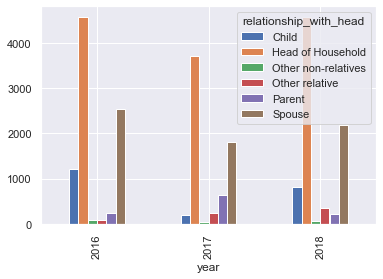

In [43]:
yr.plot.bar()
plt.legend(title='relationship_with_head')

plt.show()

### 3. Location Type


In [44]:
# Which location type has the highest cellphone_access?
lc =pd.crosstab(train.location_type,train.cellphone_access)
lc

cellphone_access,No,Yes
location_type,,
Rural,3273,11070
Urban,2797,6384


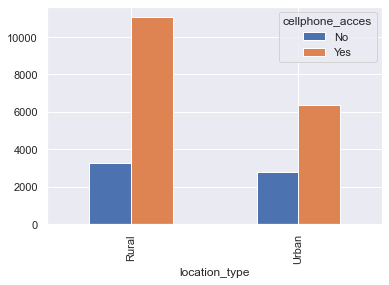

In [45]:
lc.plot.bar()
plt.legend(title='cellphone_acces')

plt.show()

- We can see that Rural areas have a high access of cellphone services as compared to urban areas 


In [46]:
#Which location has the highest approved  bank_accounts?
lb = pd.crosstab(train.location_type,train.bank_account)
lb

bank_account,No,Yes
location_type,,
Rural,12672,1671
Urban,7540,1641


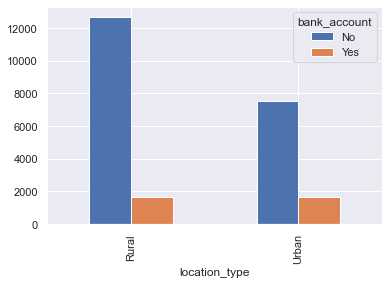

In [47]:
lb.plot.bar()
plt.legend(title='bank_account')

plt.show()

 - There is no huge difference between urban and rural individuals who have access to bank accounts .

In [48]:
# what is the household size distribution over the given location types 
lf= pd.crosstab(train.location_type,train.fam_bin)
lf

fam_bin,Small,Medium,Large
location_type,,,
Rural,3587,6846,3910
Urban,4699,3401,1081


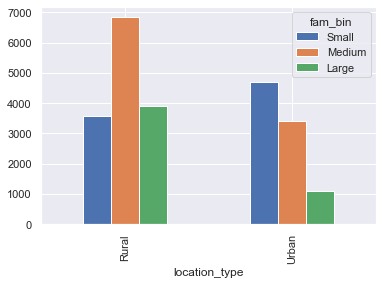

In [49]:
lf.plot.bar()
plt.legend(title='fam_bin')

plt.show()

- We can see that in rural households a large number of the distribution are medium 
- For urban a large number have small household distribution


In [50]:
# What is the leading relationship with head over location type?
lr = pd.crosstab(train.location_type,train.relationship_with_head)
lr

relationship_with_head,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse
location_type,,,,,,
Rural,1589,7725,83,353,483,4110
Urban,640,5106,107,315,603,2410


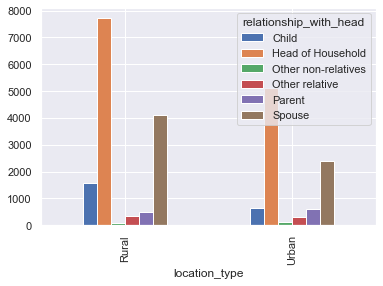

In [51]:
lr.plot.bar()
plt.legend(title='relationship_with_head')

plt.show()

- In both locations , head of household is leading 

In [52]:
# what is the marital status over the location_type?
lm = pd.crosstab(train.location_type,train.marital_status)
lm

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed
location_type,,,,,
Rural,1188,3,7904,3406,1842
Urban,888,5,2845,4577,866


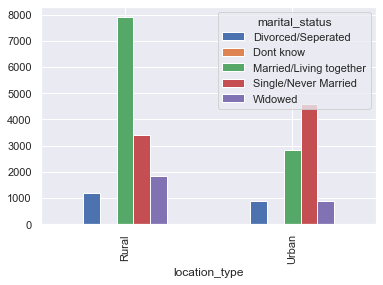

In [53]:
lm.plot.bar()
plt.legend(title='marital_status')

plt.show()

- We  can conclude that a large number of individuals living in rural areas are married 
- We can also conclude that a large number of individuals living in urban areas are single 


In [54]:
#What is the highest level of education over the location_type?
le = pd.crosstab(train.location_type,train.education_level)
le

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
location_type,,,,,,
Rural,3162,19,7899,2384,495,384
Urban,1353,16,4892,1839,662,419


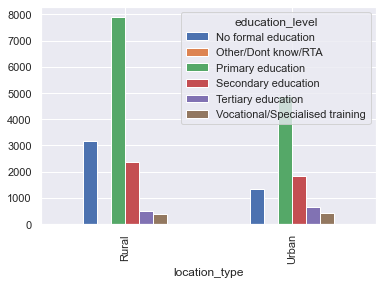

In [55]:
le.plot.bar()
plt.legend(title='education_level')

plt.show()

In [56]:
#What is the job_distribution_type over the location?
lj =pd.crosstab(train.location_type,train.job_type)
lj

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
location_type,,,,,,,,,,
Rural,96,4997,167,482,153,3760,299,632,1348,2409
Urban,30,444,220,573,94,1837,328,448,1179,4028


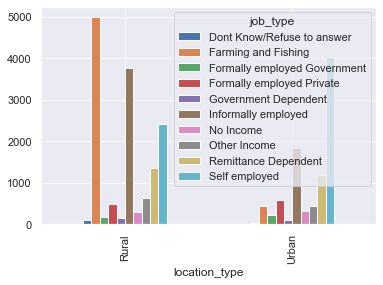

In [57]:
lj.plot.bar()
plt.legend(title='job_type')

plt.show()

- A large number of individuals from the rural areas practice farming and fishing .
- A large number of individuals from urban areas are self employed .

### 4. Cellphone Access 

In [58]:
# Does household size affect cellphone_access?
cf =pd.crosstab(train.cellphone_access,train.fam_bin)
cf

fam_bin,Small,Medium,Large
cellphone_access,,,
No,2763,2229,1078
Yes,5523,8018,3913


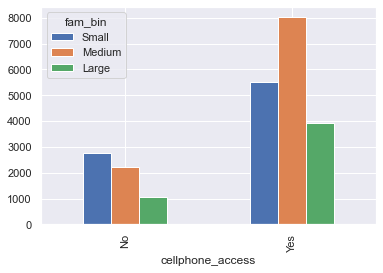

In [59]:
cf.plot.bar()
plt.legend(title='fam_bin')

plt.show()

In [60]:
# which age has  a large number of cellphone access?
ca= pd.crosstab(train.cellphone_access,train.age_bins)
ca

age_bins,Young,Youth,Adult,Old-ish
cellphone_access,,,,
No,1772,1153,1105,2040
Yes,4444,4805,4502,3703


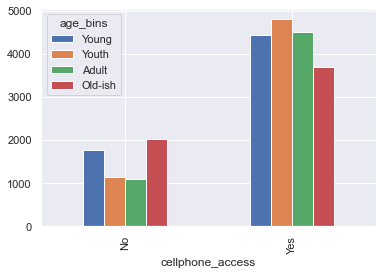

In [61]:
ca.plot.bar()
plt.legend(title='age_bins')

plt.show()

In [62]:
# which gender has access to cellphone access?
cg = pd.crosstab(train.cellphone_access,train.gender_of_respondent)
cg

gender_of_respondent,Female,Male
cellphone_access,,
No,4099,1971
Yes,9778,7676


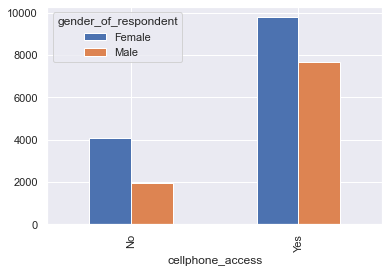

In [63]:
cg.plot.bar()
plt.legend(title='gender_of_respondent')

plt.show()

In [64]:
# Does cellphone access allow more bank_account approval?
cb=pd.crosstab(train.cellphone_access,train.bank_account)
cb

bank_account,No,Yes
cellphone_access,,
No,5966,104
Yes,14246,3208


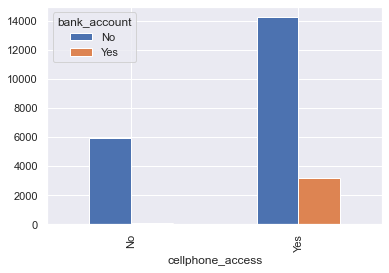

In [65]:
cb.plot.bar()
plt.legend(title='bank_account')

plt.show()

In [66]:
#Does marital status affect cellphone_access?
cm=pd.crosstab(train.cellphone_access,train.marital_status)
cm

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed
cellphone_access,,,,,
No,620,1,1962,2380,1107
Yes,1456,7,8787,5603,1601


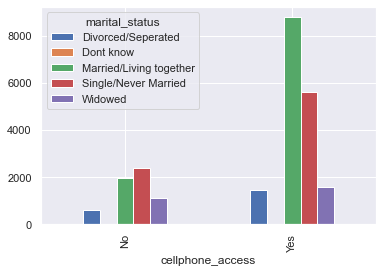

In [67]:
cm.plot.bar()
plt.legend(title='marital_status')

plt.show()

In [68]:
#Does education level affect cellphone access ?
ce= pd.crosstab(train.cellphone_access,train.education_level)
ce

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
cellphone_access,,,,,,
No,1995,12,3350,615,76,22
Yes,2520,23,9441,3608,1081,781


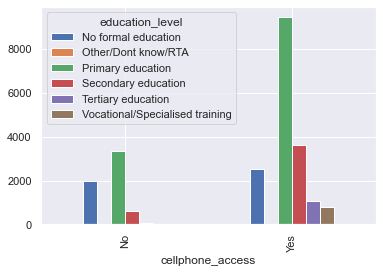

In [69]:
ce.plot.bar()
plt.legend(title='education_level')

plt.show()

In [70]:
#Does job_type affect cellphone_access?
cj = pd.crosstab(train.cellphone_access,train.job_type)
cj

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
cellphone_access,,,,,,,,,,
No,31,918,6,47,125,1481,334,293,917,1918
Yes,95,4523,381,1008,122,4116,293,787,1610,4519


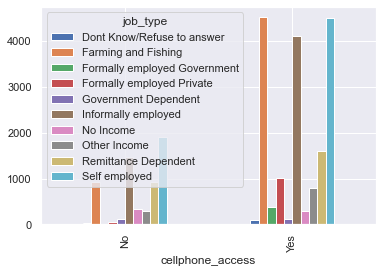

In [71]:
cj.plot.bar()
plt.legend(title='job_type')

plt.show()

### 5 Household Size 


In [72]:
# Does household_size affect bank approval?
fb = pd.crosstab(train.fam_bin,train.bank_account)
fb

bank_account,No,Yes
fam_bin,,
Small,7083,1203
Medium,8760,1487
Large,4369,622


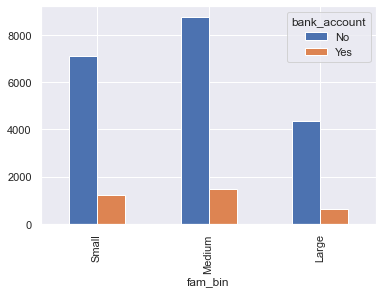

In [73]:
fb.plot.bar()
plt.legend(title='bank_account')

plt.show()

### 6 Age 

In [74]:
#Does age affect bank approval?
ab= pd.crosstab(train.age_bins,train.bank_account)
ab

bank_account,No,Yes
age_bins,,
Young,5627,589
Youth,4966,992
Adult,4633,974
Old-ish,4986,757


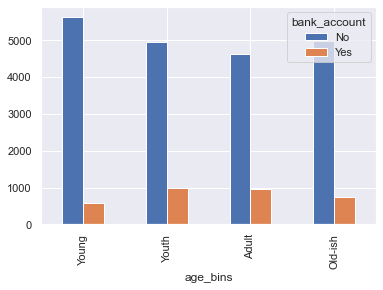

In [75]:
ab.plot.bar()
plt.legend(title='bank_account')

plt.show()

In [76]:
# Gender distribution for age range
af =pd.crosstab(train.age_bins,train.fam_bin)
af

fam_bin,Small,Medium,Large
age_bins,,,
Young,1964,2908,1344
Youth,2042,2796,1120
Adult,1704,2241,1662
Old-ish,2576,2302,865


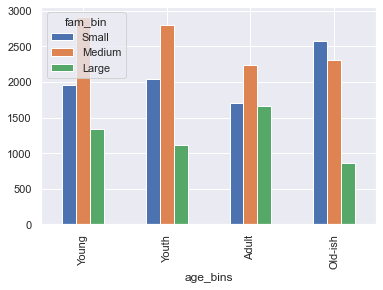

In [77]:
af.plot.bar()
plt.legend(title='fam_bin')

plt.show()

In [78]:
# relationship with head for each age_range
ar = pd.crosstab(train.age_bins,train.relationship_with_head)
ar

relationship_with_head,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse
age_bins,,,,,,
Young,1779,1386,143,487,841,1580
Youth,282,3123,23,93,152,2285
Adult,99,3682,14,43,56,1713
Old-ish,69,4640,10,45,37,942


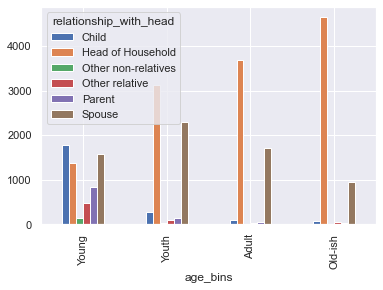

In [79]:
ar.plot.bar()
plt.legend(title='relationship_with_head')

plt.show()

In [80]:
# Marital status for age range 
am = pd.crosstab(train.age_bins,train.marital_status)
am

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed
age_bins,,,,,
Young,950,1,1639,3595,31
Youth,429,3,3487,1911,128
Adult,395,1,3204,1484,523
Old-ish,302,3,2419,993,2026


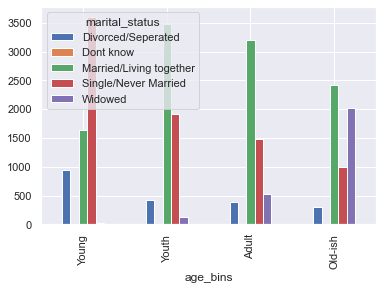

In [81]:
am.plot.bar()
plt.legend(title='marital_status')

plt.show()

### 7 Gender 


In [82]:
# Gender distribution for country
gc =pd.crosstab(train.gender_of_respondent,train.country)
gc

country,Kenya,Rwanda,Tanzania,Uganda
gender_of_respondent,,,,
Female,3482,5204,3806,1385
Male,2586,3531,2814,716


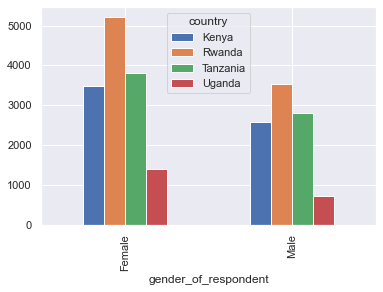

In [83]:
gc.plot.bar()
plt.legend(title='country')

plt.show()

In [84]:
# Gender distribution by year
gt = pd.crosstab(train.gender_of_respondent,train.year)
gt 

year,2016,2017,2018
gender_of_respondent,,,
Female,5204,3806,4867
Male,3531,2814,3302


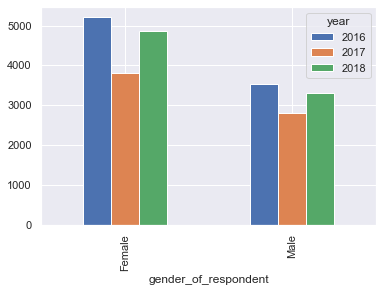

In [85]:
gt.plot.bar()
plt.legend(title='year')

plt.show()

In [86]:
# Gender distribution by location type
gl = pd.crosstab(train.gender_of_respondent,train.location_type)
gl

location_type,Rural,Urban
gender_of_respondent,,
Female,8534,5343
Male,5809,3838


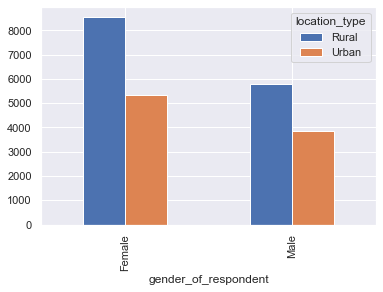

In [87]:
gl.plot.bar()
plt.legend(title='location_type')

plt.show()

In [88]:
# Gender distribution by age 
ga = pd.crosstab(train.gender_of_respondent,train.age_bins)
ga

age_bins,Young,Youth,Adult,Old-ish
gender_of_respondent,,,,
Female,3804,3566,3134,3373
Male,2412,2392,2473,2370


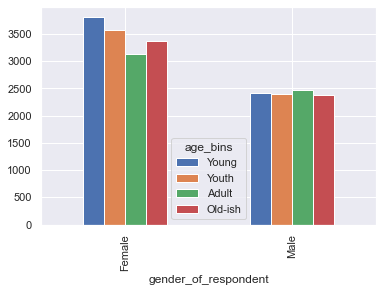

In [89]:
ga.plot.bar()
plt.legend(title='age_bins')

plt.show()

In [90]:
#Gender distribution on education level
ge = pd.crosstab(train.gender_of_respondent,train.education_level)
ge

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
gender_of_respondent,,,,,,
Female,3187,22,7434,2235,578,421
Male,1328,13,5357,1988,579,382


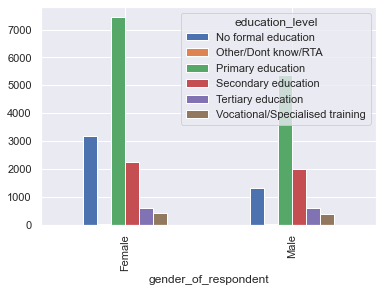

In [91]:
ge.plot.bar()
plt.legend(title='education_level')

plt.show()

In [92]:
# Gender distribution by  job_type
gj = pd.crosstab(train.gender_of_respondent,train.job_type)
gj

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
gender_of_respondent,,,,,,,,,,
Female,80,3219,185,473,174,3044,507,665,1924,3606
Male,46,2222,202,582,73,2553,120,415,603,2831


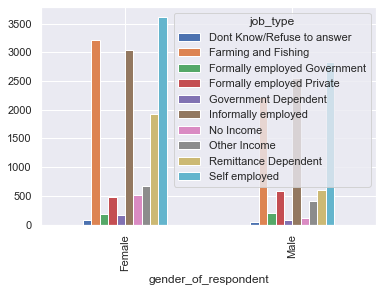

In [93]:
gj.plot.bar()
plt.legend(title='job_type')

plt.show()

In [94]:
train.columns 

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'fam_bin', 'age_bins'],
      dtype='object')

In [95]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,fam_bin,age_bins
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Medium,Young
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Medium,Old-ish
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Medium,Young
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Medium,Youth
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Large,Young


In [96]:
train.dtypes

country                     object
year                         int64
uniqueid                    object
bank_account                object
location_type               object
cellphone_access            object
household_size               int64
age_of_respondent            int64
gender_of_respondent        object
relationship_with_head      object
marital_status              object
education_level             object
job_type                    object
fam_bin                   category
age_bins                  category
dtype: object

In [97]:
#change the data types 
#train['year']=train['year'].astype('category')
train['household_size'] = train['household_size'].astype('int32')
train['age_of_respondent'] = train['age_of_respondent'].astype('int32')

test['household_size'] = test['household_size'].astype('int32')
test['age_of_respondent'] = test['age_of_respondent'].astype('int32')


In [98]:
train.dtypes

country                     object
year                         int64
uniqueid                    object
bank_account                object
location_type               object
cellphone_access            object
household_size               int32
age_of_respondent            int32
gender_of_respondent        object
relationship_with_head      object
marital_status              object
education_level             object
job_type                    object
fam_bin                   category
age_bins                  category
dtype: object

In [99]:
# label binarize the following columns 

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
train['bank_account']=lb.fit_transform(train['bank_account'])
train['location_type']= lb.fit_transform(train['location_type'])
train['cellphone_access']=lb.fit_transform(train['cellphone_access'])
train['gender_of_respondent'] = lb.fit_transform(train['gender_of_respondent'])


test['location_type']= lb.fit_transform(test['location_type'])
test['cellphone_access']=lb.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = lb.fit_transform(test['gender_of_respondent'])

train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,fam_bin,age_bins
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed,Medium,Young
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent,Medium,Old-ish
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Medium,Young
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private,Medium,Youth
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed,Large,Young


In [100]:
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'country'.
train['country_code']= label_encoder.fit_transform(train['country'])

test['country_code']= label_encoder.fit_transform(test['country'])

train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,fam_bin,age_bins,country_code
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed,Medium,Young,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent,Medium,Old-ish,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Medium,Young,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private,Medium,Youth,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed,Large,Young,0


In [101]:
# replacing don't knows on marital_status and education_level with the median for each column 
print(train['marital_status'].mode())

print(train['education_level'].mode())

0    Married/Living together
dtype: object
0    Primary education
dtype: object


In [102]:
train['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [103]:
train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [104]:
train['marital_status']=train['marital_status'].replace(to_replace ="Dont know", value ="Married/Living together")

test['marital_status']=test['marital_status'].replace(to_replace ="Dont know", value ="Married/Living together")

train['marital_status'].value_counts()

Married/Living together    10757
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Name: marital_status, dtype: int64

In [105]:
train['education_level'] = train['education_level'].replace(to_replace="Other/Dont know/RTA", value="Primary education")

test['education_level'] = test['education_level'].replace(to_replace="Other/Dont know/RTA", value="Primary education")

train["education_level"].value_counts()

Primary education                  12826
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Name: education_level, dtype: int64

In [106]:
# have a look at our dataframe once again
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,fam_bin,age_bins,country_code
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed,Medium,Young,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent,Medium,Old-ish,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Medium,Young,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private,Medium,Youth,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed,Large,Young,0


In [107]:
## First attempt 
# lets drop unique_id ,country and  bank_account 
trainId =train['uniqueid']
y = train['bank_account']

testId = test['uniqueid']
testCountry =test['country']
X = train.drop(['uniqueid','bank_account','country','household_size','age_of_respondent'],axis=1)
Xtest = test.drop(['uniqueid','country','household_size','age_of_respondent'],axis=1)

categ_features = ['country_code']

In [108]:
X1 = pd.get_dummies(X)

Xx = pd.get_dummies(Xtest)
print(X1.shape)
print(Xx.shape)

(23524, 37)
(10086, 37)


In [109]:
X1.head()

,year,location_type,cellphone_access,gender_of_respondent,country_code,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,fam_bin_Small,fam_bin_Medium,fam_bin_Large,age_bins_Young,age_bins_Youth,age_bins_Adult,age_bins_Old-ish
0,2018,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,2018,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,1,1,1,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
3,2018,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2018,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X1,y,random_state=23,test_size=0.20)

from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

In [111]:
cbc = CatBoostClassifier()
cbc.fit(X_train,y_train)
cbc_preds = cbc.predict(X_test)
print("Accuracy score for CatBoostClassifier is :",accuracy_score(y_test,cbc_preds))
print("ROC_AUC_SCORE  for CatBoostClassifier is: ",roc_auc_score(y_test,cbc_preds))

Learning rate set to 0.036073
0:	learn: 0.6609611	total: 169ms	remaining: 2m 48s
1:	learn: 0.6368603	total: 184ms	remaining: 1m 31s
2:	learn: 0.6063168	total: 200ms	remaining: 1m 6s
3:	learn: 0.5796372	total: 215ms	remaining: 53.4s
4:	learn: 0.5528308	total: 230ms	remaining: 45.8s
5:	learn: 0.5333619	total: 247ms	remaining: 40.9s
6:	learn: 0.5147967	total: 262ms	remaining: 37.2s
7:	learn: 0.4974831	total: 277ms	remaining: 34.3s
8:	learn: 0.4800279	total: 292ms	remaining: 32.1s
9:	learn: 0.4659288	total: 307ms	remaining: 30.4s
10:	learn: 0.4523958	total: 322ms	remaining: 29s
11:	learn: 0.4411293	total: 335ms	remaining: 27.6s
12:	learn: 0.4300433	total: 350ms	remaining: 26.6s
13:	learn: 0.4189870	total: 365ms	remaining: 25.7s
14:	learn: 0.4101035	total: 383ms	remaining: 25.2s
15:	learn: 0.4017775	total: 400ms	remaining: 24.6s
16:	learn: 0.3938857	total: 415ms	remaining: 24s
17:	learn: 0.3854347	total: 430ms	remaining: 23.5s
18:	learn: 0.3779924	total: 446ms	remaining: 23s
19:	learn: 0.37

167:	learn: 0.2629558	total: 2.96s	remaining: 14.7s
168:	learn: 0.2628574	total: 2.98s	remaining: 14.7s
169:	learn: 0.2627728	total: 3s	remaining: 14.6s
170:	learn: 0.2627189	total: 3.01s	remaining: 14.6s
171:	learn: 0.2626548	total: 3.04s	remaining: 14.6s
172:	learn: 0.2626048	total: 3.06s	remaining: 14.6s
173:	learn: 0.2625108	total: 3.07s	remaining: 14.6s
174:	learn: 0.2624105	total: 3.09s	remaining: 14.6s
175:	learn: 0.2623330	total: 3.11s	remaining: 14.5s
176:	learn: 0.2622592	total: 3.12s	remaining: 14.5s
177:	learn: 0.2621501	total: 3.14s	remaining: 14.5s
178:	learn: 0.2620919	total: 3.15s	remaining: 14.5s
179:	learn: 0.2620361	total: 3.17s	remaining: 14.4s
180:	learn: 0.2618947	total: 3.19s	remaining: 14.4s
181:	learn: 0.2618141	total: 3.2s	remaining: 14.4s
182:	learn: 0.2616907	total: 3.22s	remaining: 14.4s
183:	learn: 0.2615909	total: 3.24s	remaining: 14.4s
184:	learn: 0.2615241	total: 3.25s	remaining: 14.3s
185:	learn: 0.2614431	total: 3.27s	remaining: 14.3s
186:	learn: 0.26

326:	learn: 0.2511997	total: 5.55s	remaining: 11.4s
327:	learn: 0.2511094	total: 5.57s	remaining: 11.4s
328:	learn: 0.2510572	total: 5.58s	remaining: 11.4s
329:	learn: 0.2510208	total: 5.6s	remaining: 11.4s
330:	learn: 0.2509805	total: 5.62s	remaining: 11.4s
331:	learn: 0.2509149	total: 5.63s	remaining: 11.3s
332:	learn: 0.2508637	total: 5.65s	remaining: 11.3s
333:	learn: 0.2508160	total: 5.67s	remaining: 11.3s
334:	learn: 0.2507422	total: 5.69s	remaining: 11.3s
335:	learn: 0.2506725	total: 5.71s	remaining: 11.3s
336:	learn: 0.2506018	total: 5.73s	remaining: 11.3s
337:	learn: 0.2504942	total: 5.75s	remaining: 11.3s
338:	learn: 0.2504426	total: 5.76s	remaining: 11.2s
339:	learn: 0.2503829	total: 5.78s	remaining: 11.2s
340:	learn: 0.2503264	total: 5.79s	remaining: 11.2s
341:	learn: 0.2502597	total: 5.81s	remaining: 11.2s
342:	learn: 0.2501809	total: 5.82s	remaining: 11.2s
343:	learn: 0.2501053	total: 5.84s	remaining: 11.1s
344:	learn: 0.2500449	total: 5.86s	remaining: 11.1s
345:	learn: 0

485:	learn: 0.2427064	total: 8.29s	remaining: 8.77s
486:	learn: 0.2426570	total: 8.3s	remaining: 8.75s
487:	learn: 0.2425898	total: 8.32s	remaining: 8.73s
488:	learn: 0.2425489	total: 8.34s	remaining: 8.71s
489:	learn: 0.2425056	total: 8.36s	remaining: 8.7s
490:	learn: 0.2424686	total: 8.39s	remaining: 8.7s
491:	learn: 0.2424311	total: 8.4s	remaining: 8.67s
492:	learn: 0.2424080	total: 8.42s	remaining: 8.65s
493:	learn: 0.2423903	total: 8.43s	remaining: 8.63s
494:	learn: 0.2423389	total: 8.44s	remaining: 8.61s
495:	learn: 0.2422761	total: 8.46s	remaining: 8.6s
496:	learn: 0.2422304	total: 8.48s	remaining: 8.58s
497:	learn: 0.2421701	total: 8.5s	remaining: 8.56s
498:	learn: 0.2421287	total: 8.51s	remaining: 8.55s
499:	learn: 0.2420837	total: 8.53s	remaining: 8.53s
500:	learn: 0.2420401	total: 8.55s	remaining: 8.52s
501:	learn: 0.2420043	total: 8.57s	remaining: 8.5s
502:	learn: 0.2419706	total: 8.58s	remaining: 8.48s
503:	learn: 0.2419494	total: 8.59s	remaining: 8.46s
504:	learn: 0.24189

648:	learn: 0.2358444	total: 10.8s	remaining: 5.87s
649:	learn: 0.2358201	total: 10.9s	remaining: 5.85s
650:	learn: 0.2357787	total: 10.9s	remaining: 5.83s
651:	learn: 0.2357510	total: 10.9s	remaining: 5.82s
652:	learn: 0.2356830	total: 10.9s	remaining: 5.8s
653:	learn: 0.2356743	total: 10.9s	remaining: 5.78s
654:	learn: 0.2356385	total: 10.9s	remaining: 5.76s
655:	learn: 0.2356105	total: 11s	remaining: 5.74s
656:	learn: 0.2355476	total: 11s	remaining: 5.73s
657:	learn: 0.2355011	total: 11s	remaining: 5.71s
658:	learn: 0.2354910	total: 11s	remaining: 5.69s
659:	learn: 0.2354731	total: 11s	remaining: 5.68s
660:	learn: 0.2354312	total: 11s	remaining: 5.66s
661:	learn: 0.2354044	total: 11.1s	remaining: 5.64s
662:	learn: 0.2353783	total: 11.1s	remaining: 5.63s
663:	learn: 0.2353280	total: 11.1s	remaining: 5.61s
664:	learn: 0.2352959	total: 11.1s	remaining: 5.59s
665:	learn: 0.2352854	total: 11.1s	remaining: 5.58s
666:	learn: 0.2352554	total: 11.1s	remaining: 5.56s
667:	learn: 0.2352455	tot

807:	learn: 0.2310405	total: 13.4s	remaining: 3.18s
808:	learn: 0.2310261	total: 13.4s	remaining: 3.16s
809:	learn: 0.2309852	total: 13.4s	remaining: 3.15s
810:	learn: 0.2309652	total: 13.4s	remaining: 3.13s
811:	learn: 0.2309405	total: 13.4s	remaining: 3.11s
812:	learn: 0.2309276	total: 13.5s	remaining: 3.1s
813:	learn: 0.2309130	total: 13.5s	remaining: 3.08s
814:	learn: 0.2308890	total: 13.5s	remaining: 3.06s
815:	learn: 0.2308635	total: 13.5s	remaining: 3.04s
816:	learn: 0.2308533	total: 13.5s	remaining: 3.03s
817:	learn: 0.2308282	total: 13.5s	remaining: 3.01s
818:	learn: 0.2308120	total: 13.6s	remaining: 3s
819:	learn: 0.2307813	total: 13.6s	remaining: 2.98s
820:	learn: 0.2307528	total: 13.6s	remaining: 2.96s
821:	learn: 0.2307053	total: 13.6s	remaining: 2.95s
822:	learn: 0.2306522	total: 13.6s	remaining: 2.93s
823:	learn: 0.2306305	total: 13.6s	remaining: 2.91s
824:	learn: 0.2306206	total: 13.7s	remaining: 2.9s
825:	learn: 0.2305926	total: 13.7s	remaining: 2.88s
826:	learn: 0.230

970:	learn: 0.2263557	total: 16s	remaining: 476ms
971:	learn: 0.2263257	total: 16s	remaining: 460ms
972:	learn: 0.2262855	total: 16s	remaining: 444ms
973:	learn: 0.2262377	total: 16s	remaining: 427ms
974:	learn: 0.2262152	total: 16s	remaining: 411ms
975:	learn: 0.2261807	total: 16s	remaining: 394ms
976:	learn: 0.2261606	total: 16s	remaining: 378ms
977:	learn: 0.2261475	total: 16.1s	remaining: 361ms
978:	learn: 0.2261244	total: 16.1s	remaining: 345ms
979:	learn: 0.2260666	total: 16.1s	remaining: 329ms
980:	learn: 0.2260443	total: 16.1s	remaining: 312ms
981:	learn: 0.2260024	total: 16.1s	remaining: 296ms
982:	learn: 0.2259913	total: 16.1s	remaining: 279ms
983:	learn: 0.2259673	total: 16.2s	remaining: 263ms
984:	learn: 0.2259400	total: 16.2s	remaining: 246ms
985:	learn: 0.2259212	total: 16.2s	remaining: 230ms
986:	learn: 0.2259001	total: 16.2s	remaining: 213ms
987:	learn: 0.2258659	total: 16.2s	remaining: 197ms
988:	learn: 0.2258443	total: 16.2s	remaining: 181ms
989:	learn: 0.2258288	tota

In [112]:
import lightgbm as lgb
from xgboost import XGBClassifier


lgbc = lgb.LGBMClassifier()
xgbc =XGBClassifier(objective="binary:logistic")


In [113]:
lgbc.fit(X_train,y_train)
lgbc_preds = lgbc.predict(X_test)
print("Accuracy score for LGBMClassifier is :",accuracy_score(y_test,lgbc_preds))
print("ROC_AUC_SCORE  for LGBMClassifier is: ",roc_auc_score(y_test,lgbc_preds))

Accuracy score for LGBMClassifier is : 0.8765143464399575
ROC_AUC_SCORE  for LGBMClassifier is:  0.6598591046905654


In [114]:
xgbc.fit(X_train,y_train)
xgbc_preds = cbc.predict(X_test)
print("Accuracy score for CatBoostClassifier is :",accuracy_score(y_test,xgbc_preds))
print("ROC_AUC_SCORE  for CatBoostClassifier is: ",roc_auc_score(y_test,xgbc_preds))

[11:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score for CatBoostClassifier is : 0.8750265674814027
ROC_AUC_SCORE  for CatBoostClassifier is:  0.6601640806135188


In [116]:
preds  =  cbc.predict(Xx)*0.4 + xgbc.predict(Xx)*0.4+lgbc.predict(Xx)*0.2


#convert the predictions to pandas dataframe
submission = pd.DataFrame(data={'uniqueid':testId+' x '+ testCountry,'bank_account':preds})

submission.to_csv('Submission.csv',index=False)

In [120]:
# catboost gridsearchCV